In [2]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
# root_proj = Path("/Users/yk/Documents/Projects/Pre-PhD")
root_proj = Path("/Users/alesk/Documents/Git-repo/Pre-PhD")
if str(root_proj/"src") not in sys.path:
    sys.path.append(str(root_proj/"src"))

In [3]:
year = 2022
file_name = root_proj / f"DATA_SYSTEM_LIDL/DTS_LIDL_{year}.csv"
dts = pd.read_csv(file_name, sep=";")
dts

,Date,PV,EV
0,1/01/2022 1:00,0.0,0.68
1,1/01/2022 1:15,0.0,0.08
2,1/01/2022 1:30,0.0,0.08
3,1/01/2022 1:45,0.0,0.08
4,1/01/2022 2:00,0.0,0.08
...,...,...,...
34940,31/12/2022 0:00,0.0,0.12
34941,31/12/2022 0:15,0.0,0.08
34942,31/12/2022 0:30,0.0,0.08
34943,31/12/2022 0:45,0.0,0.08


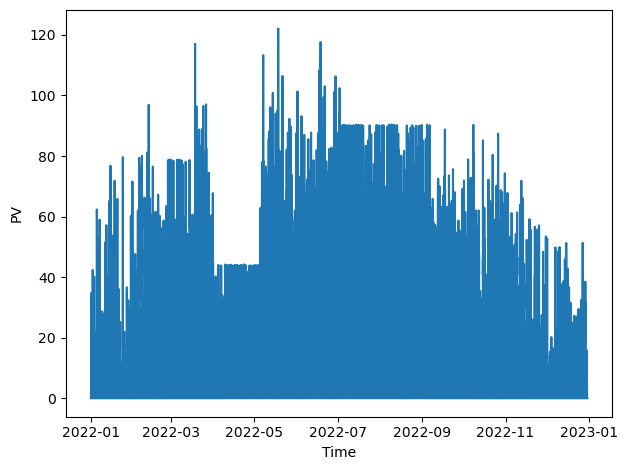

In [4]:
# create a datetime index from 1/01/{year} 01:00 to 31/12/{year} 01:00 at 15-minute intervals
import matplotlib.pyplot as plt
x = pd.date_range(start=f'{year}-01-01 01:00', end=f'{year}-12-31 01:00', freq='15min')

plt.plot(x[:len(dts)], dts['PV'])
plt.xlabel('Time')
plt.ylabel('PV')
plt.tight_layout()
plt.show()

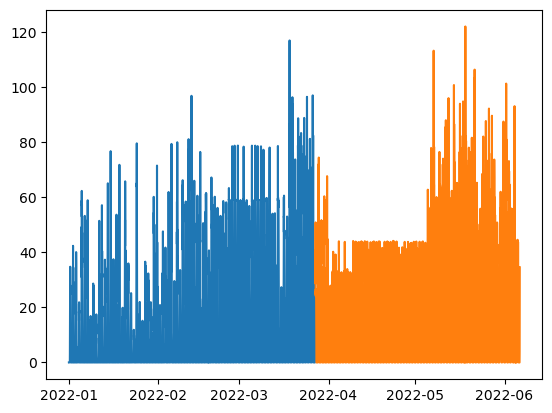

In [25]:
initial = 8192
final = 15000 

df_train = dts.iloc[:initial]
df_test = dts.iloc[initial:final]
plt.plot(x[:len(df_train)],df_train['PV'], label='Train')
plt.plot(x[len(df_train):final],df_test['PV'], label='Test')

In [13]:
dts.index[dts['Date'] == '13/04/2022 1:00']

Index([9792], dtype='int64')

In [14]:
dts.iloc[9792]

Date    13/04/2022 1:00
PV                  0.0
EV                 0.08
Name: 9792, dtype: object